In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Files to load
ride_data_to_load = "data/ride_data.csv"
city_data_to_load = "data/city_data.csv"

# Read the City and Ride Data
ride_data = pd.read_csv(ride_data_to_load)
city_data = pd.read_csv(city_data_to_load)

In [7]:
# Combine the data into a single dataset
rideshare_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
rideshare_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
# Organize the DataFrame by city name
rideshare_data = rideshare_data.sort_values("city")
rideshare_data.head()

,city,date,fare,ride_id,driver_count,type
919,Amandaburgh,2018-04-24 08:02:27,14.55,7836117055007,12,Urban
239,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753,12,Urban
235,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban
164,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
1155,Amandaburgh,2018-03-07 02:26:33,18.76,3419454549176,12,Urban


In [9]:
# Calculate the average fare for each city
city_avg_fare = rideshare_data.groupby("city")["fare"].mean()
city_avg_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [10]:
# Calculate the total number of rides for each city
city_total_rides = rideshare_data.groupby("city")["ride_id"].count()
city_total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [11]:
# Calculate the total number of drivers for each city
city_total_drivers = rideshare_data.groupby("city")["driver_count"].mean()
#city_total_drivers = city_total_drivers.sort_values("city")
city_total_drivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [12]:
# Determine the type of environment for each city (Urban, Suburban, Rural)
city_sorted = city_data.sort_values("city")
city_type = city_sorted.set_index(["city"])["type"]
city_type.head()

city
Amandaburgh         Urban
Barajasview         Urban
Barronchester    Suburban
Bethanyland      Suburban
Bradshawfurt        Rural
Name: type, dtype: object

In [13]:
# Create a DataFrame to analyze the following for each city:
# average fare amount
# total number of rides
# total number of drivers
# city type
rideshare_df = pd.DataFrame({
    "Average Fare": city_avg_fare,
    "Total Rides": city_total_rides,
    "Total Drivers": city_total_drivers,
    "City Type": city_type
})
rideshare_df.head()

,Average Fare,Total Rides,Total Drivers,City Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [14]:
# Create a DataFrame to analyze each type of environment for each city (Urban, Suburban, Rural)
rural_df = rideshare_df.loc[rideshare_df["City Type"] == "Rural"]
suburban_df = rideshare_df.loc[rideshare_df["City Type"] == "Suburban"]
urban_df = rideshare_df.loc[rideshare_df["City Type"] == "Urban"]

In [15]:
rural_df.head()

,Average Fare,Total Rides,Total Drivers,City Type
city,,,,
Bradshawfurt,40.064000,10,7,Rural
Garzaport,24.123333,3,7,Rural
Harringtonfort,33.470000,6,4,Rural
Jessicaport,36.013333,6,1,Rural
Lake Jamie,34.358333,6,4,Rural


In [16]:
suburban_df.head()

,Average Fare,Total Rides,Total Drivers,City Type
city,,,,
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Brandonfort,35.437368,19,10,Suburban
Colemanland,30.894545,22,23,Suburban
Davidfurt,31.995882,17,23,Suburban


In [17]:
urban_df.head()

,Average Fare,Total Rides,Total Drivers,City Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Carriemouth,28.314444,27,52,Urban
Christopherfurt,24.501852,27,41,Urban
Deanville,25.842632,19,49,Urban


## Bubble Plot of Ride Sharing Data

In [18]:
# Obtain the x and y coordinates for each of the three city types
rural_x = rural_df["Total Rides"]
rural_y = rural_df["Average Fare"]

suburban_x = suburban_df["Total Rides"]
suburban_y = suburban_df["Average Fare"]

urban_x = urban_df["Total Rides"]
urban_y = urban_df["Average Fare"]

# Obtain the driver totals for each city in the three city types
rural_drivers = rural_df["Total Drivers"]
suburban_drivers = suburban_df["Total Drivers"]
urban_drivers = urban_df["Total Drivers"]

In [41]:
#help(plt.scatter(rural_x, rural_y))

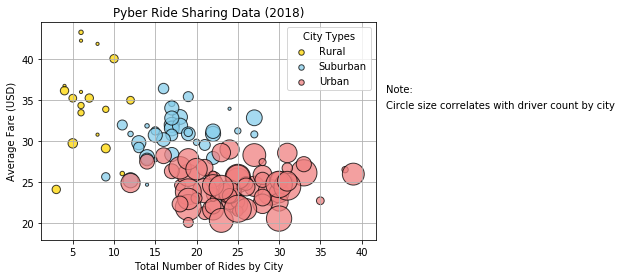

In [70]:
# Build the scatter plots for each city type
plt.scatter(rural_x, rural_y, marker="o", facecolors="gold", edgecolors="black", s=rural_drivers*10, alpha=0.75)
plt.scatter(suburban_x, suburban_y, marker="o", facecolors="skyblue", edgecolors="black", s=suburban_drivers*10, alpha=0.75)
plt.scatter(urban_x, urban_y, marker="o", facecolors="lightcoral", edgecolors="black", s=urban_drivers*10, alpha=0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides by City")
plt.ylabel("Average Fare (USD)")

# Set a grid on the plot
plt.grid()

# Incorporate a text label regarding circle size
plt.text(43, 36, "Note:")
plt.text(43, 34, "Circle size correlates with driver count by city")

# Create a legend
legend = plt.legend(("Rural", "Suburban", "Urban"), title="City Types")

# Make all the circles in the legend the same size
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Save Figure
plt.savefig("../Images/pyber_scatter.png")

# Show plot
plt.show()

## Total Fares by City Type

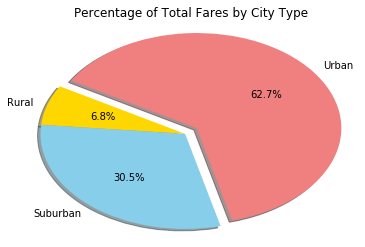

In [69]:
# Calculate the total of fares in each city
city_total_fare = rideshare_data.groupby("city")["fare"].sum()

# Build a DataFrame to compare city total fares broken down by type of environment
total_fare_df = pd.DataFrame({
    "Total Fares": city_total_fare,
    "City Type": city_type
})

# Build a DataFrame to analyze each type of environment for each city (Urban, Suburban, Rural)
rural_fare_df = total_fare_df.loc[rideshare_df["City Type"] == "Rural"]
suburban_fare_df = total_fare_df.loc[rideshare_df["City Type"] == "Suburban"]
urban_fare_df = total_fare_df.loc[rideshare_df["City Type"] == "Urban"]

# Calculate the fare totals for each city type
rural_fare_total = rural_fare_df["Total Fares"].sum()
suburban_fare_total = suburban_fare_df["Total Fares"].sum()
urban_fare_total = urban_fare_df["Total Fares"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_fare_total, suburban_fare_total, urban_fare_total]
colors = ["gold", "skyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Percentage of Total Fares by City Type")
plt.axis("auto")

# Save Figure
plt.savefig("../Images/fares_by_city_type_pie.png")

# Show Figure
plt.show()

## Total Rides by City Type

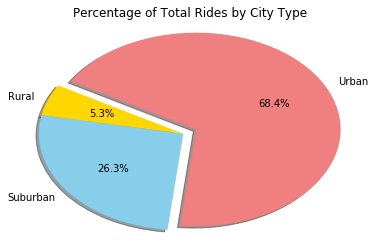

In [81]:
# Calculate the number of rides by city type
rural_ride_total = rural_df["Total Rides"].sum()
suburban_ride_total = suburban_df["Total Rides"].sum()
urban_ride_total = urban_df["Total Rides"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_ride_total, suburban_ride_total, urban_ride_total]
colors = ["gold", "skyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode, labels, colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Percentage of Total Rides by City Type")
plt.axis("auto")

# Save Figure
plt.savefig("../Images/rides_by_city_type_pie.png")

# Show Figure
plt.show()

## Total Drivers by City Type

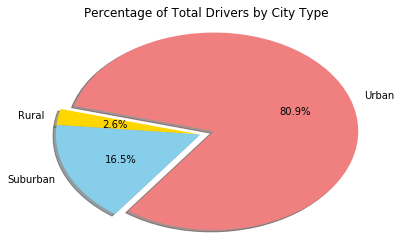

In [84]:
# Calculate the number of drivers by city type
rural_driver_total = rural_df["Total Drivers"].sum()
suburban_driver_total = suburban_df["Total Drivers"].sum()
urban_driver_total = urban_df["Total Drivers"].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_driver_total, suburban_driver_total, urban_driver_total]
colors = ["gold", "skyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode, labels, colors, autopct="%1.1f%%", shadow=True, startangle=165)
plt.title("Percentage of Total Drivers by City Type")
plt.axis("auto")

# Save Figure
plt.savefig("../Images/drivers_by_city_type_pie.png")

# Show Figure
plt.show()